<a href="https://colab.research.google.com/github/TranThiDieuHien/DO_AN_1/blob/main/DOAN_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import thư viện
import numpy as np
import pandas as pd
import re
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 50
plt.rcParams.update({'font.size': 18})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


HOTEL INFORMATION

In [2]:
#Plot
def hist_plot(data):
    # Kiem tra data co chuan hay khong?
    mean = np.mean(data)
    # ddof=1 :: hiệu chỉnh
    std = np.std(data, ddof=1)
    domain = np.linspace(np.min(data), np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    #density=True :: chuẩn hóa dữ liệu về normal
    plt.hist(data, edgecolor='green', density=True)
    plt.show()

In [3]:
#doc file
data = pd.read_csv("ThuaThienHue_Infor.csv")


In [6]:
data.sample(10)

,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
193,"12 Cao Xuan Huy, Vy Da, Hue Vietnam",2.0,78.0,NaN,NaN,Mina Home,NaN,NaN,NaN,Which popular attractions are close to Mina Ho...,...,0.0,NaN,0.0,NaN,40.0,NaN,0.0,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
286,"37/48 Ngo Quyen Street, Hue Vietnam",26.0,94.0,NaN,NaN,Hong Phat Hostel,$14,$10,$10 - $14,Which popular attractions are close to Hong Ph...,...,NaN,NaN,NaN,NaN,176.0,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
8,"Phu Thuan Beach Xuan An road, An Duong Vietnam",NaN,NaN,177.0,NaN,The Beach Bar Hue,$35,NaN,$19 - $35,Which popular attractions are close to The Bea...,...,164.0,#1 of 1 hostel in An DÆ°Æ¡ng,4.0,2.0,NaN,Very good,8.0,NaN,8.0,https://www.tripadvisor.com/Hotel_Review-g1225...
383,"96 Le Loi, Hue 530000 Vietnam",27.0,94.0,2.0,"English, Vietnamese",Quan Hostel,$15,$12,$12 - $15,Which popular attractions are close to Quan Ho...,...,5.0,#139 of 267 Specialty lodging in Hue,30.0,NaN,137.0,Average,6.0,Budget,2.0,https://www.tripadvisor.com/Hotel_Review-g2939...
163,"Lang Co, Phu Loc, Hue Vietnam",0.0,0.0,NaN,NaN,Tao Ngo Guest House,NaN,NaN,NaN,Which popular attractions are close to Tao Ngo...,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
592,"35 / 35 Nguyen Thai Hoc, Hue Vietnam",27.0,92.0,26.0,English,Kim's Homestay,NaN,NaN,NaN,Which popular attractions are close to Kim's H...,...,77.0,#18 of 183 B&Bs / Inns in Hue,4.5,NaN,152.0,Excellent,4.0,"Budget,Centrally Located",3.0,https://www.tripadvisor.com/Hotel_Review-g2939...
674,"08 Nguyen Cong Tru street, Hue 53000 Vietnam",26.0,94.0,31.0,"English, French, Vietnamese",Home Hotel,$17,$16,$16 - $17,Which popular attractions are close to Home Ho...,...,226.0,#32 of 209 hotels in Hue,45.0,30.0,135.0,Excellent,12.0,"Charming,Centrally Located",8.0,https://www.tripadvisor.com/Hotel_Review-g2939...
155,"12 Nguyen Trai, Hue Vietnam",27.0,92.0,NaN,NaN,Truong Tam Phong,NaN,NaN,NaN,Which popular attractions are close to Truong ...,...,0.0,NaN,0.0,NaN,168.0,NaN,0.0,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
281,"20/16 Hai Ba Trung, Hue Vietnam",9.0,91.0,NaN,"English, Vietnamese",Anh Tuan Guesthouse,$14,$11,$11 - $14,Which popular attractions are close to Anh Tua...,...,4.0,#95 of 183 B&Bs / Inns in Hue,20.0,20.0,39.0,Poor,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
5,"Phu Thuan Beach, Phu Thuan Town, Hue, An Duong...",NaN,NaN,263.0,"English, French, Vietnamese",Villa Louise Hue Beach & Spa,$103,NaN,$61 - $103,What are some of the property amenities at Vil...,...,196.0,#1 of 1 hotel in An DÆ°Æ¡ng,4.5,NaN,NaN,Excellent,25.0,Romantic,28.0,https://www.tripadvisor.com/Hotel_Review-g1225...


In [7]:
#Thong ke co ban cac du lieu cua tap du
data["HRNumber"] = pd.to_numeric(data["HRNumber"], errors='coerce')
data["HRoom"] = pd.to_numeric(data["HRoom"], errors='coerce')

In [8]:
data.describe()

,HAttractions,HGFW,HImages,HRImages,HRNumber,HRankreview,HRating,HRestaurants,HRoom,HVideos
count,655.000000,631.000000,259.000000,259.000000,531.000000,552.000000,218.000000,655.000000,530.000000,427.000000
mean,14.329771,74.573693,131.370656,46.845560,61.502825,13.289855,8.901376,79.622901,24.035849,10.238876
std,16.335117,25.696344,325.553556,101.344294,152.236576,17.950685,9.557522,79.279533,41.003258,32.871482
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,65.000000,10.000000,8.000000,1.000000,1.000000,2.000000,18.000000,5.000000,0.000000
50%,8.000000,84.000000,25.000000,16.000000,4.000000,4.500000,3.000000,43.000000,11.000000,1.000000
75%,26.000000,93.000000,66.000000,35.000000,32.000000,25.000000,20.000000,139.000000,23.750000,5.000000
max,115.000000,99.000000,2624.000000,725.000000,983.000000,50.000000,40.000000,467.000000,331.000000,416.000000


In [9]:
HAttractions = data["HAttractions"]
HGFW = data["HGFW"]
HImages = data["HImages"]
HRImages = data["HRImages"]
HRNumber = data["HRNumber"]
HRankreview = data["HRankreview"]
HRating = data["HRating"]
HRestaurants = data["HRestaurants"]
HRoom = data["HRoom"]
HVideos = data["HVideos"]

In [10]:
import statistics as sta
#Tính mode
print(sta.mode(HGFW))
print(sta.mode(HAttractions))
print(sta.mode(HImages))
print(sta.mode(HRImages))
print(sta.mode(HRNumber))
print(sta.mode(HRankreview))
print(sta.mode(HRating))
print(sta.mode(HRestaurants))
print(sta.mode(HRoom))
print(sta.mode(HVideos))

94.0
27.0
10.0
10.0
0.0
0.0
2.0
0.0
0.0
0.0


In [11]:
#Tính median
print(sta.median(HGFW))
print(sta.median(HAttractions))
print(sta.median(HImages))
print(sta.median(HRImages))
print(sta.median(HRNumber))
print(sta.median(HRankreview))
print(sta.median(HRating))
print(sta.median(HRestaurants))
print(sta.median(HRoom))
print(sta.median(HVideos))

97.0
nan
nan
nan
nan
nan
nan
466.5
nan
nan


In [12]:
#Tính số dữ liệu trống (null)
data.isna().sum()

HAddress         29
HAttractions     37
HGFW             61
HImages         433
HLanguage       407
HName             0
HPMax           280
HPMin           299
HPRange         280
HQuestions       28
HRImages        433
HRNumber        161
HRank           274
HRankreview     140
HRating         474
HRestaurants     37
HReview         272
HRoom           162
HStyles         468
HVideos         265
URL               0
dtype: int64

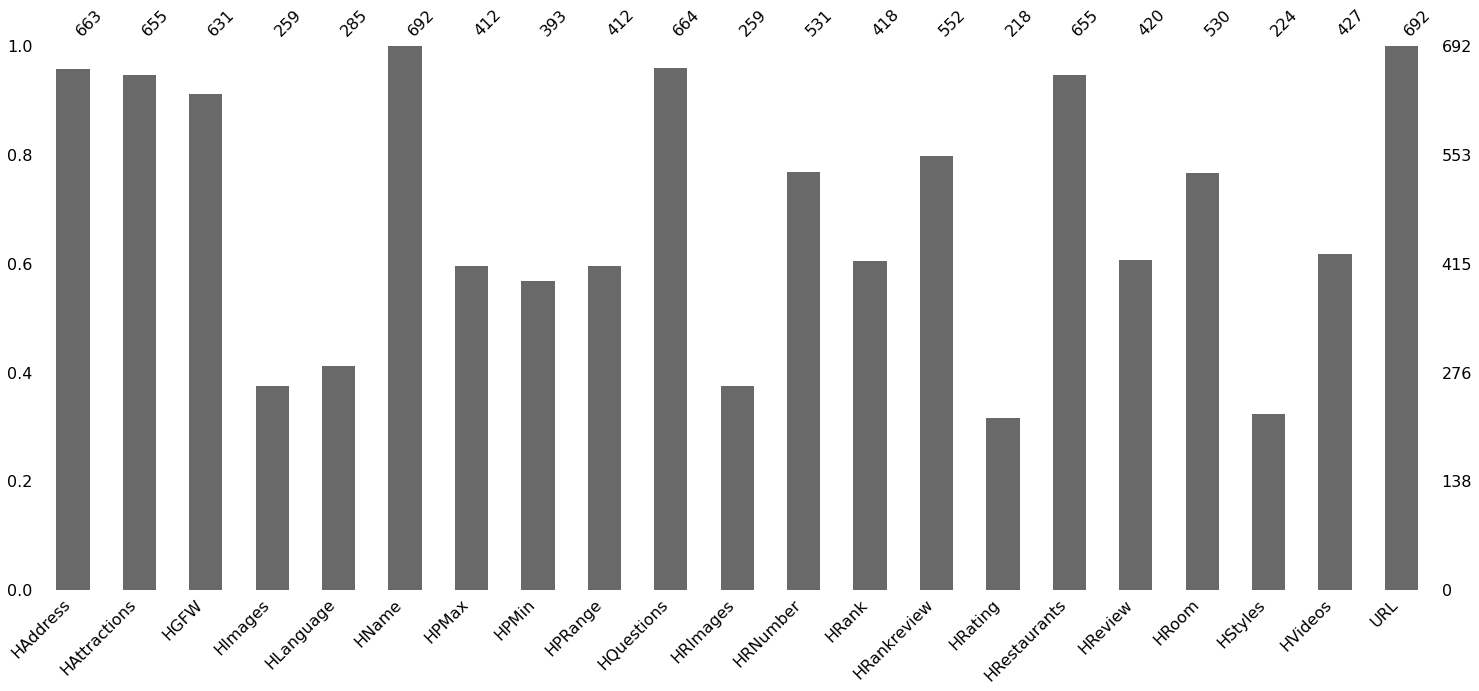

In [13]:
import missingno as msno
msno.bar(data)

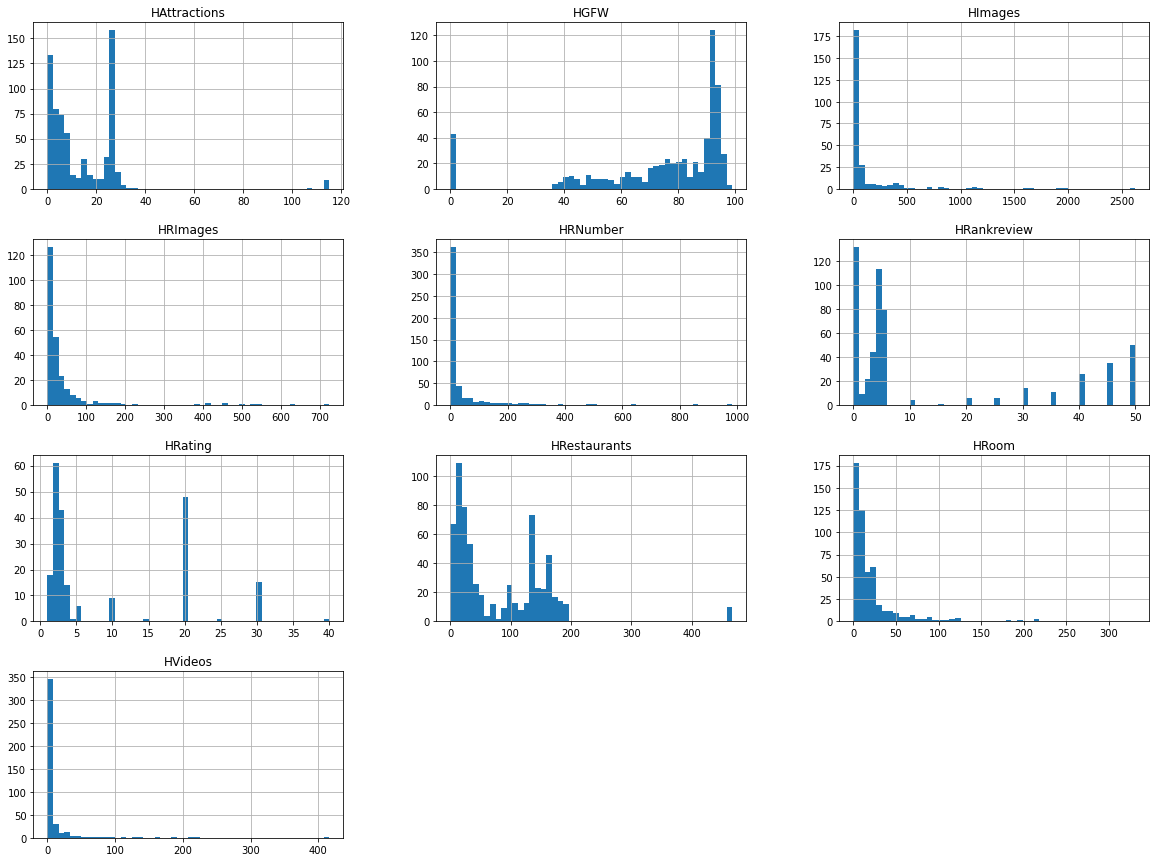

In [14]:
%matplotlib inline 
data.hist(bins=50, figsize=(20,15))
plt.show()

HOTEL REVIEW COMMENTS

In [15]:
#doc file
data_comment = pd.read_csv("ThuaThienHue.csv")

In [16]:
data_comment.sample(4)

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url
10253,We have visited many resorts in Vietnam with o...,JHNB1,212.0,May-16,122.0,16-May,Trip type: Traveled with family,3.0,Lang Co Beach Resort,"Cambridge, United Kingdom",https://www.tripadvisor.com/Profile/JHNB1,Quality needs to improve,https://www.tripadvisor.com/Hotel_Review-g1192...
2193,Alba was a very pleasant surprise. A modern ho...,JonnyWolf,55.0,Dec-15,13.0,15-Dec,Trip type: Traveled as a couple,5.0,Alba Spa Hotel,"Cape Town Central, South Africa",https://www.tripadvisor.com/Profile/JonnyWolf,Great hotel,https://www.tripadvisor.com/Hotel_Review-g2939...
22308,"The staff were exceptionally friendly, apartme...",Eleonora T,3.0,17-Oct,1.0,17-Oct,Traveled as a couple,5.0,Hue Riverside Villa,NaN,https://www.tripadvisor.com/Profile/332eleonorat,Fabulous accommodation in a rustic setting by ...,https://www.tripadvisor.com/Hotel_Review-g2939...
6975,We arrived as a typhoon was coming ashore clos...,James T,128.0,Sep-17,50.0,17-Sep,Traveled as a couple,4.0,Midtown Hotel Hue,"Dubai, United Arab Emirates",https://www.tripadvisor.com/Profile/H7211KNjamest,A good hotel in a good location,https://www.tripadvisor.com/Hotel_Review-g2939...


In [17]:
#Xem thong tin cua dataframe
data_comment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22557 entries, 0 to 22556
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HComment            21922 non-null  object 
 1   HCommenter          21921 non-null  object 
 2   HContribute         21907 non-null  float64
 3   HDate               21896 non-null  object 
 4   HThanks             19209 non-null  float64
 5   HTime               21924 non-null  object 
 6   HTravelType         18585 non-null  object 
 7   HTravelerRating     21929 non-null  float64
 8   h_Hotel_name        21937 non-null  object 
 9   h_reviewer_address  17291 non-null  object 
 10  h_reviewer_id       21909 non-null  object 
 11  h_title_comment     21922 non-null  object 
 12  h_url               22557 non-null  object 
dtypes: float64(3), object(10)
memory usage: 2.2+ MB


In [18]:
#Dem so phan tram tung xep loai tu 1-5 sao
data_comment["HTravelerRating"].value_counts(normalize = True)

5.0    0.693967
4.0    0.202152
3.0    0.061289
2.0    0.023941
1.0    0.018651
Name: HTravelerRating, dtype: float64

In [19]:
#Tao cot thang luu tru tu cot ngay luu tru
data_comment["Month of stay"] = data_comment["HDate"].apply(lambda x: "".join(re.findall(r'(Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)', str(x))))
data_comment

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url,Month of stay
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...,
1,"Fantastic room, excellent staff and fabulous e...",mikelambert56,8.0,Feb-22,8.0,22-Feb,NaN,5.0,Azerai La Residence Hue,"Shanghai Region, China",https://www.tripadvisor.com/Profile/mikelambert56,Great Experience,https://www.tripadvisor.com/Hotel_Review-g2939...,Feb
2,We stayed at Azerai La Residence Hue during th...,Daniel H,30.0,Feb-22,46.0,22-Feb,NaN,5.0,Azerai La Residence Hue,"Shanghai, China",https://www.tripadvisor.com/Profile/dannygold1087,"BEST customer service, a quiet and peaceful ge...",https://www.tripadvisor.com/Hotel_Review-g2939...,Feb
3,I'm just back from two nights at the Azerai La...,JWeiden,141.0,Apr-21,84.0,21-Apr,NaN,5.0,Azerai La Residence Hue,"Ho Chi Minh City, Vietnam",https://www.tripadvisor.com/Profile/JWeiden,Updated Art Deco colonial-era hotel with wonde...,https://www.tripadvisor.com/Hotel_Review-g2939...,Apr
4,We stayed here for four nights in April 2021. ...,Navrig,99.0,Apr-21,58.0,21-Apr,NaN,5.0,Azerai La Residence Hue,"Ho Chi Minh City, Vietnam",https://www.tripadvisor.com/Profile/Navrig,Wonderful hotel and fantastic staff,https://www.tripadvisor.com/Hotel_Review-g2939...,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22552,We were pleased with the room compared to othe...,LuciandMatt,20.0,NaN,8.0,09-Dec,NaN,4.0,Sunny B Hotel,NaN,https://www.tripadvisor.com/Profile/LuciandMatt,"Large Rooms with Balcony, Bath, & PC",https://www.tripadvisor.com/Hotel_Review-g2939...,
22553,"We were met by the owner in the street, he con...",comnen,332.0,09-Dec,277.0,09-Dec,Traveled as a couple,4.0,Sunny B Hotel,Moscow,https://www.tripadvisor.com/Profile/comnen,nice stay,https://www.tripadvisor.com/Hotel_Review-g2939...,Dec
22554,Stayed for two nights and chose the 'penthouse...,BunCha_Gal,25.0,09-May,11.0,09-May,Traveled as a couple,4.0,Sunny B Hotel,"Sydney, Australia",https://www.tripadvisor.com/Profile/BunCha_Gal,"Excellent location, relax on the penthouse bal...",https://www.tripadvisor.com/Hotel_Review-g2939...,May
22555,"Guidebook recommendation. We got a big, airy r...",KMKTraveller,75.0,09-Apr,68.0,09-May,Traveled as a couple,3.0,Sunny B Hotel,"Stockholm, Sweden",https://www.tripadvisor.com/Profile/KMKTraveller,"Perfectly fine, nothing fancy",https://www.tripadvisor.com/Hotel_Review-g2939...,Apr


In [20]:
# Dem so chu
data_comment["Word_count"] = data_comment["HComment"].apply(lambda x: len(str(x).split()))
data_comment.head()

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url,Month of stay,Word_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...,,1
1,"Fantastic room, excellent staff and fabulous e...",mikelambert56,8.0,Feb-22,8.0,22-Feb,NaN,5.0,Azerai La Residence Hue,"Shanghai Region, China",https://www.tripadvisor.com/Profile/mikelambert56,Great Experience,https://www.tripadvisor.com/Hotel_Review-g2939...,Feb,41
2,We stayed at Azerai La Residence Hue during th...,Daniel H,30.0,Feb-22,46.0,22-Feb,NaN,5.0,Azerai La Residence Hue,"Shanghai, China",https://www.tripadvisor.com/Profile/dannygold1087,"BEST customer service, a quiet and peaceful ge...",https://www.tripadvisor.com/Hotel_Review-g2939...,Feb,137
3,I'm just back from two nights at the Azerai La...,JWeiden,141.0,Apr-21,84.0,21-Apr,NaN,5.0,Azerai La Residence Hue,"Ho Chi Minh City, Vietnam",https://www.tripadvisor.com/Profile/JWeiden,Updated Art Deco colonial-era hotel with wonde...,https://www.tripadvisor.com/Hotel_Review-g2939...,Apr,136
4,We stayed here for four nights in April 2021. ...,Navrig,99.0,Apr-21,58.0,21-Apr,NaN,5.0,Azerai La Residence Hue,"Ho Chi Minh City, Vietnam",https://www.tripadvisor.com/Profile/Navrig,Wonderful hotel and fantastic staff,https://www.tripadvisor.com/Hotel_Review-g2939...,Apr,136


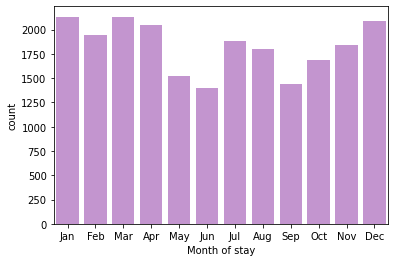

In [21]:
month =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.despine()
sns.countplot(x="Month of stay", data=data_comment, order=month, color='#C88BD9');

REVIEW HOTEL COMMENTS VIETNAMESE

In [22]:
#doc file
data_comment_viet = pd.read_csv("ThuaThienHue_cmt_Viet.csv")

In [23]:
#Dem so phan tram tung xep loai tu 1-5 sao
data_comment_viet["HTravelerRating"].value_counts(normalize = True)

5.0    0.701970
4.0    0.155524
3.0    0.066854
1.0    0.049613
2.0    0.026038
Name: HTravelerRating, dtype: float64

In [45]:
#Tao cot thang luu tru tu cot ngay luu tru
data_comment_viet["Month of stay"] = data_comment_viet["HDate"].apply(lambda x: "".join(re.findall(r'(Tháng 12|Tháng 11|Tháng 10|Tháng 1|Tháng 2|Tháng 3|Tháng 4|Tháng 5/|Tháng 6|Tháng 7|Tháng 8|Tháng 9)', str(x))))
data_comment_viet.sample(5)


,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url,Month of stay
2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...,
785,"Quay lại nơi này vào tháng 10 vừa rồi, gia đìn...",Hoàng Võ,2.0,Tháng 10 năm 2021,NaN,thg 11 2021,Đã du lịch với gia đình,5.0,Angsana Lang Co Vietnam,NaN,https://www.tripadvisor.com.vn/Profile/Tommy06...,Chuyến đi thú vị,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 10
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...,
2271,"Ở đó trong vài đêm, thật đáng yêu và một trải ...",Charly E,33.0,Tháng 8 năm 2019,6.0,thg 8 2019,NaN,5.0,Shark Homestay,"Madrid, Tây Ban Nha",https://www.tripadvisor.com.vn/Profile/charlye...,Ở lại tuyệt vời!,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 8
1169,"Tôi vừa ở khách sạn này trong 3 đêm từ 13/2, c...",Phamthuhang1708,24.0,Tháng 2 năm 2015,15.0,thg 3 2015,Đã du lịch theo đôi,5.0,Khách sạn Phong Nha,"Hà Nội, Việt Nam",https://www.tripadvisor.com.vn/Profile/Phamthu...,Khách sạn tốt,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 2


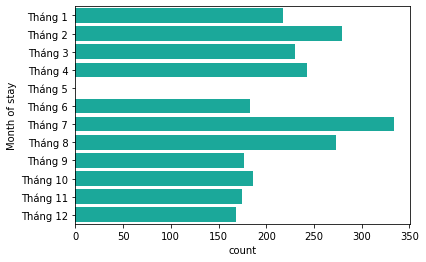

In [59]:
month_viet =['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12']
sns.despine()
sns.countplot(y="Month of stay", data=data_comment_viet, order=month_viet, color='#04BFAD');

In [62]:
data_comment_viet["Year of stay"] = data_comment_viet["HDate"].apply(lambda x: "".join(re.findall("\d\d\d\d", str(x))))
data_comment_viet

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url,Month of stay,Year of stay
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...,,
1,"Tọa lạc ngay trung tâm thành phố, cạnh bờ sông...",Lee,23.0,Tháng 10 năm 2018,NaN,thg 10 2018,NaN,5.0,Azerai La Residence Hue,NaN,https://www.tripadvisor.com.vn/Profile/pxtx1015,Du lịch,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 10,2018
2,"tôi đã có dịp ghé qua đây để xem phòng, nhưng ...",Tăng Ly,6.0,Tháng 9 năm 2018,2.0,thg 9 2018,NaN,2.0,Azerai La Residence Hue,NaN,https://www.tripadvisor.com.vn/Profile/818lyt,không hài lòng,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 9,2018
3,Đã không còn quản lý của Accor nhưng service v...,Lagoon Homestay,94.0,Tháng 10 năm 2017,24.0,thg 9 2018,NaN,4.0,Azerai La Residence Hue,"Hội An, Việt Nam",https://www.tripadvisor.com.vn/Profile/hoianho...,Rất tốt theo Tiêu Chuẩn Accor,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 10,2017
4,Khách sạn nằm ngay vị trí thuận lợi cho việc t...,Schaeme Tu Travel Leisure,185.0,Tháng 11 năm 2017,109.0,thg 11 2017,NaN,5.0,Azerai La Residence Hue,"Cần Thơ, Việt Nam",https://www.tripadvisor.com.vn/Profile/schaeme...,"Thân Thiện, Thoải Mái.",https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,"Tôi thích nó ở đây, các nhân viên tuyệt vời rấ...",David N,6.0,Tháng 11 năm 2018,1.0,đã viết đánh giá vào thg 11 2018,Đã du lịch với bạn bè,5.0,Gardenia Hue Hotel,NaN,https://www.tripadvisor.com.vn/Profile/Venture...,Tuyệt vời,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 11,2018
3235,Khách sạn hoàn toàn mới. Nó rất sạch sẽ và nhâ...,ragno21,14.0,Tháng 10 năm 2018,18.0,đã viết đánh giá vào thg 10 2018,Đã du lịch theo đôi,5.0,Gardenia Hue Hotel,"Dublin, Ireland",https://www.tripadvisor.com.vn/Profile/ragno21,Chuyến thăm Huế,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 10,2018
3236,Tôi đã đi công tác. Chọn khách sạn này là một ...,Exploration822212,3.0,Tháng 9 năm 2018,NaN,đã viết đánh giá vào thg 10 2018,Đã du lịch theo đôi,5.0,Gardenia Hue Hotel,NaN,https://www.tripadvisor.com.vn/Profile/Explora...,Rất khuyên !!,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 9,2018
3237,Chúng tôi đã có thời gian rất tốt ở Huế.\r\nKh...,meradmaya,3.0,Tháng 10 năm 2018,5.0,đã viết đánh giá vào thg 10 2018,Đã du lịch với bạn bè,5.0,Gardenia Hue Hotel,"Paris, Pháp",https://www.tripadvisor.com.vn/Profile/meradmaya,Một cách hết sức dễ chịu,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 10,2018


In [63]:
data_comment_viet["Year of stay"].unique()

array(['', '2018', '2017', '2022', '2020', '2016', '2014', '2019', '2015',
       '2021', '2013'], dtype=object)

In [64]:
# Dem so chu
data_comment_viet["Word_count"] = data_comment_viet["HComment"].apply(lambda x: len(str(x).split()))
data_comment_viet.head()

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url,Month of stay,Year of stay,Word_count
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com.vn/Hotel_Review-g2...,,,1
1,"Tọa lạc ngay trung tâm thành phố, cạnh bờ sông...",Lee,23.0,Tháng 10 năm 2018,NaN,thg 10 2018,NaN,5.0,Azerai La Residence Hue,NaN,https://www.tripadvisor.com.vn/Profile/pxtx1015,Du lịch,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 10,2018,51
2,"tôi đã có dịp ghé qua đây để xem phòng, nhưng ...",Tăng Ly,6.0,Tháng 9 năm 2018,2.0,thg 9 2018,NaN,2.0,Azerai La Residence Hue,NaN,https://www.tripadvisor.com.vn/Profile/818lyt,không hài lòng,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 9,2018,70
3,Đã không còn quản lý của Accor nhưng service v...,Lagoon Homestay,94.0,Tháng 10 năm 2017,24.0,thg 9 2018,NaN,4.0,Azerai La Residence Hue,"Hội An, Việt Nam",https://www.tripadvisor.com.vn/Profile/hoianho...,Rất tốt theo Tiêu Chuẩn Accor,https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 10,2017,62
4,Khách sạn nằm ngay vị trí thuận lợi cho việc t...,Schaeme Tu Travel Leisure,185.0,Tháng 11 năm 2017,109.0,thg 11 2017,NaN,5.0,Azerai La Residence Hue,"Cần Thơ, Việt Nam",https://www.tripadvisor.com.vn/Profile/schaeme...,"Thân Thiện, Thoải Mái.",https://www.tripadvisor.com.vn/Hotel_Review-g2...,Tháng 11,2017,165


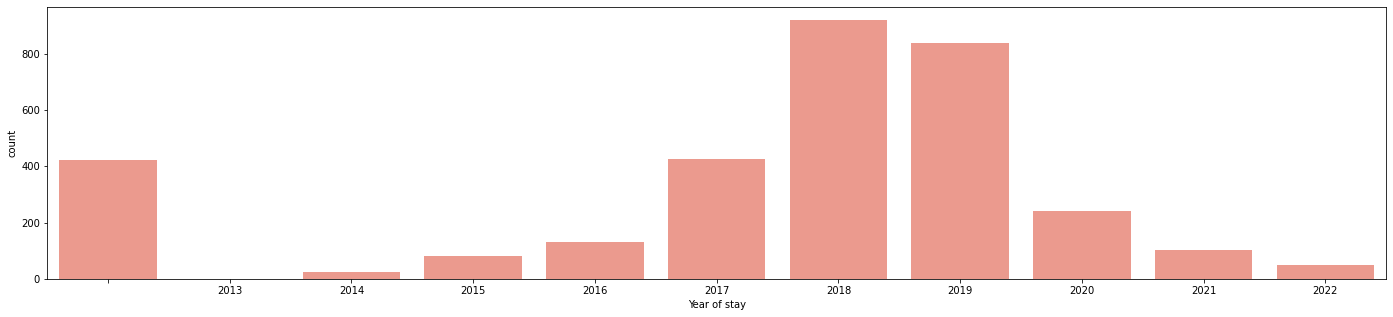

In [66]:
# Plotting number of reviews for each year
plt.figure(figsize = (24, 5))
years = ['', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022']
sns.despine()
sns.countplot(x="Year of stay", data=data_comment_viet, order=years, color='#FB8E7E');